## WORM Workshop exploration notebook

### Sample datasets:
- singlesample.csv
- acidic_hotsprings.csv
- peru.csv
- leong2021.csv
- S&C10vent.csv

### Ideas to try:
- Open a sample dataset CSV and check out the kinds of variables used in a speciation calculation.
- Refresh and run this notebook from top to bottom with Kernel > Restart Kernel and Run All Cells.
- Look through the CSV that is generated ("report.csv" by default). How is it different than the sample dataset?
- Plot the mass contribution of a different basis species, like Ca+2.
- Purposefully mis-name a basis species and check what the error message says.
- Plot the mineral saturation index of another sample.
- Plot different variables against each other with a scatterplot. Try mis-naming a variable to see which are available.
- Speciate another dataset. How did the results change?
- Plot the mass contribution of Fe+2 in the acidic_hotspring.csv sample set. What oxidation states are in the speciated complexes? How does this change if you add a column called 'Fe+3' (subheader 'Molality') in acidic_hotspring.csv, and assign a zero for each sample?

In [1]:
import AqEquil
ae = AqEquil.AqEquil()

In [2]:
speciation = ae.speciate(input_filename="peru.csv",
                         suppress_missing=True, # should missing data be considered 0 molal?
                         exclude=["Year", "Area"], # exclude metadata columns in sample sets
                         report_filename="report.csv") # create a CSV of speciation results


Using wrm to speciate DNCB17.21
Using wrm to speciate DN13CB06
Using wrm to speciate DNCB17.36
Using wrm to speciate DNCB17.37
Using wrm to speciate DN13CB14
Using wrm to speciate DNCB15.07
Using wrm to speciate DNCB15.10
Using wrm to speciate DNCB17.7b
Using wrm to speciate DN13CB11
Using wrm to speciate DNCB17.24
Using wrm to speciate DN13CB07
Using wrm to speciate DN13CB04
Using wrm to speciate DNCB17.06
Using wrm to speciate DN17CB.01
Using wrm to speciate DNCB17.30
Using wrm to speciate DNCB17.09
Using wrm to speciate DN13CB08b
Using wrm to speciate DNCB15.9b
Using wrm to speciate DN13CB13
Using wrm to speciate DNCB15.13
Using wrm to speciate DNCB17.25
Using wrm to speciate DN13CB05
Using wrm to speciate DNCB17.13
Using wrm to speciate DNCB17.02
Using wrm to speciate DNCB15.09
Using wrm to speciate DNCB17.38
Using wrm to speciate DN13CB09
Using wrm to speciate DNCB15.12
Using wrm to speciate DNCB15.08
Using wrm to speciate DNCB17.32
Using wrm to speciate DNCB17.7a
Using wrm to sp

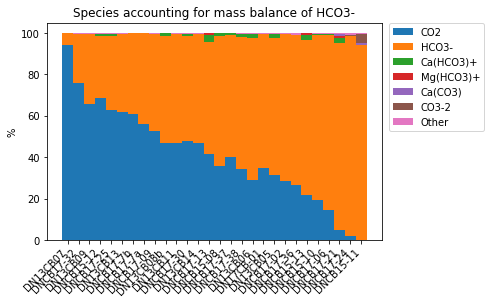

In [3]:
speciation.plot_mass_contribution("HCO3-", sort_by="pH", width=1)

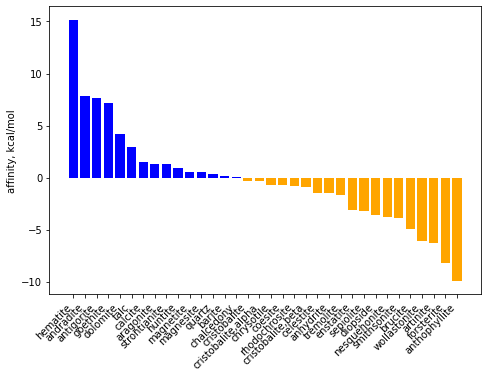

In [4]:
speciation.plot_mineral_saturation('DNCB17-21') # sample name

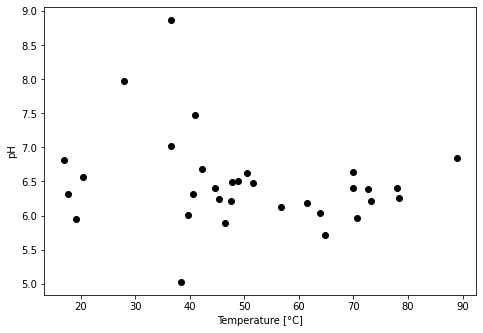

In [5]:
speciation.scatterplot('Temperature', 'pH')

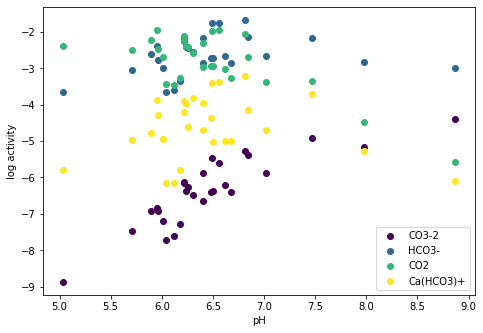

In [6]:
speciation.scatterplot('pH', ['CO3-2', 'HCO3-', 'CO2', 'Ca(HCO3)+'])

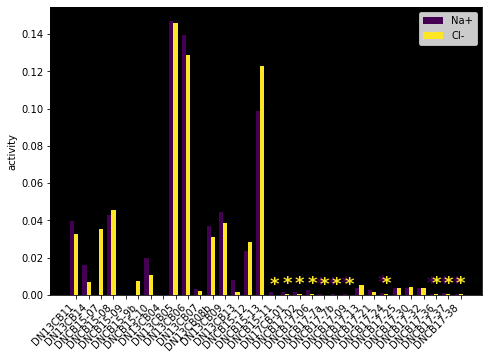

In [7]:
speciation.barplot(['Na+', 'Cl-'], bg_color='black')

# Reference

### Speciate

Get the equilibration code loaded with:

```python
import AqEquil
ae = AqEquil.AqEquil()
```

Speciate samples in 'myfile.csv' with:

```python
speciation = ae.speciate(input_filename='myfile.csv')
```

This creates the **speciation** object that stores the results. You can access these results in a few different ways.

### Tables

Look up a desired variable with:

```python
speciation.lookup('O2')
```

Look up multiple variables at once by providing a *list* (several variable names separated by commas and enclosed in square brackets):

```python
speciation.lookup(['Mg+2', 'Mg(HCO3)+', 'Mg(HSiO3)+'])
```

Get the full speciation report with:

```python
speciation.report
```

The report might be truncated in the notebook. You can view the entire report by changing some settings with:

```python
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
speciation.report
```

You can undo this with:
```python
pd.reset_option("display")
```

Another way to view the entire report is by saving it to a CSV file during speciation with:

```python
speciation = ae.speciate(input_filename='myfile.csv',
                         report_filename='myreport.csv')
```

The example above creates a file called 'myreport.csv' in the same directory as the Jupyter notebook.

### Visualization

Create a pH-temperature scatterplot with:

```python
speciation.scatterplot()
```

Or plot two variables against each other by naming them:

```python
speciation.scatterplot('Na+', 'Cl-')
```

Plot multiple series along the same x-axis by providing a list:

```python
speciation.scatterplot('pH', ['CO2', 'HCO3-', 'CO3-2'])
```

Create a bar plot comparing a variable across all samples:

```python
speciation.barplot('Fe+2')
```

Create a grouped bar plot by providing a list of variables:

```python
speciation.barplot(['Fe+2', 'Fe+3'])
```

Plot the percent contribution of aqueous species to the mass balance of a desired *basis species* with:

```python
speciation.plot_mass_contribution('HCO3-')
```

Plot mineral saturation index of a sample with:

```python
speciation.plot_mineral_saturation('sample_name')
```

where 'sample_name' is the name of a sample.